**RESTAURANT ANALYSIS**- **LEVEL 1**

🎯 Objectives

1. To explore restaurant data and identify trends in cuisine preferences, city performance, pricing distribution, and online delivery impact.

2. To derive actionable insights for understanding customer preferences and restaurant market dynamics.

🧠 Approach

1. Cleaned and prepared data (handled nulls, converted types).

2. Performed EDA using pandas, matplotlib, and seaborn.

3. Analyzed:

    Top cuisines by frequency and percentage share.

    Cities with highest restaurant counts and average ratings.

    Price range distribution and category proportions.

    Online delivery availability vs rating performance.

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load Dataset

In [2]:
df = pd.read_csv('/content/Dataset 1.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**TASK 1: Top Cuisines**

In [5]:
# Clean 'Cuisines' column – drop nulls
df = df.dropna(subset=['Cuisines'])

# Split and count each cuisine occurrence
from collections import Counter

all_cuisines = df['Cuisines'].str.split(', ')
cuisine_list = [item for sublist in all_cuisines for item in sublist]
cuisine_counts = Counter(cuisine_list)

# Convert to DataFrame
cuisine_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count'])
cuisine_df = cuisine_df.sort_values(by='Count', ascending=False)

Top 3 Cuisines:
          Cuisine  Count  Percentage
81  North Indian   3960   41.500734
9        Chinese   2735   28.662754
19     Fast Food   1986   20.813247


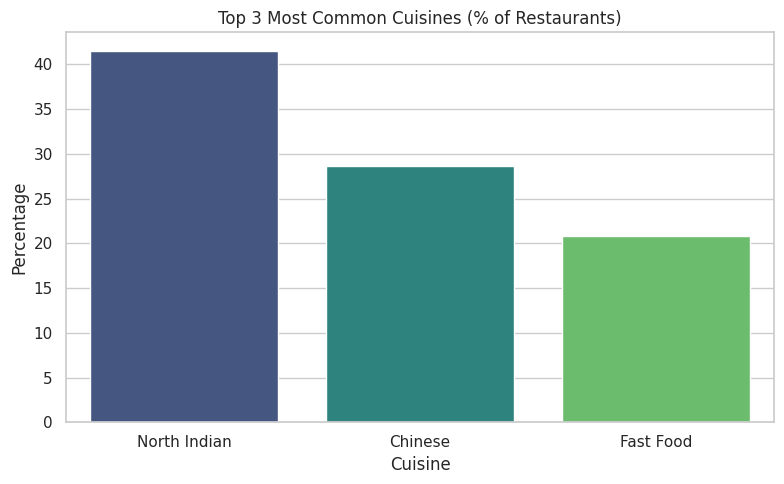

In [6]:
# Top 3 cuisines
top_3 = cuisine_df.head(3)
total_restaurants = len(df)
top_3 = top_3.copy()
top_3['Percentage'] = (top_3['Count'] / total_restaurants) * 100

# Display results
print("Top 3 Cuisines:\n", top_3)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(x='Cuisine', y='Percentage', data=top_3, hue='Cuisine', palette='viridis', legend=False)
plt.title("Top 3 Most Common Cuisines (% of Restaurants)")
plt.ylabel("Percentage")
plt.xlabel("Cuisine")
plt.tight_layout()
plt.show()

**TASK 2: City Analysis**

City with the most restaurants: New Delhi (5473 restaurants)
🌟 City with highest average rating: Inner City (4.90)


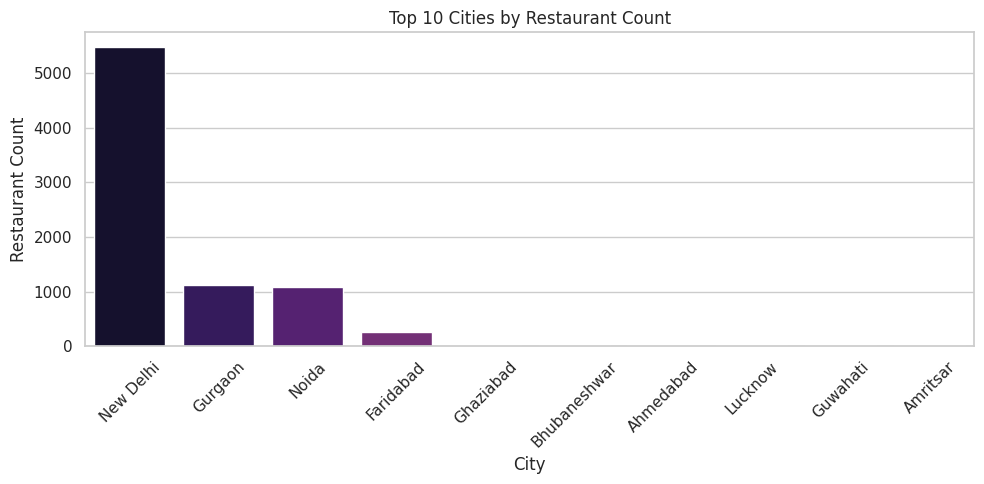

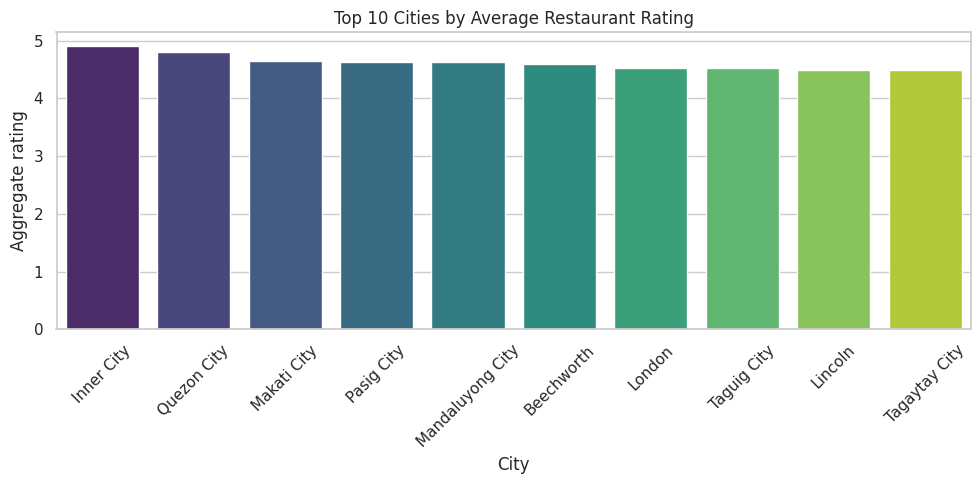

In [7]:
# Clean: Drop nulls in City or Aggregate rating
df = df.dropna(subset=['City', 'Aggregate rating'])

# Convert ratings to numeric if needed
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Count of restaurants per city
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Restaurant Count']

# Top city by number of restaurants
top_city = city_counts.iloc[0]
print(f"City with the most restaurants: {top_city['City']} ({top_city['Restaurant Count']} restaurants)")

# Calculate average rating per city
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().reset_index()
city_avg_rating = city_avg_rating.sort_values(by='Aggregate rating', ascending=False)

# Top city by average rating
top_rated_city = city_avg_rating.iloc[0]
print(f"🌟 City with highest average rating: {top_rated_city['City']} ({top_rated_city['Aggregate rating']:.2f})")

# Optional: Merge and plot
top_10_cities = city_counts.head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top_10_cities, x='City', y='Restaurant Count', hue='City', palette='magma', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Restaurant Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=city_avg_rating.head(10), x='City', y='Aggregate rating', hue='City', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Average Restaurant Rating")
plt.tight_layout()
plt.show()

**TASK 3: Price Range Distribution**

Unique Price Ranges: [3 4 2 1]
   Price Range  Restaurant Count  Percentage
0            1              4438   46.510166
1            2              3113   32.624188
2            3              1405   14.724376
3            4               586    6.141270


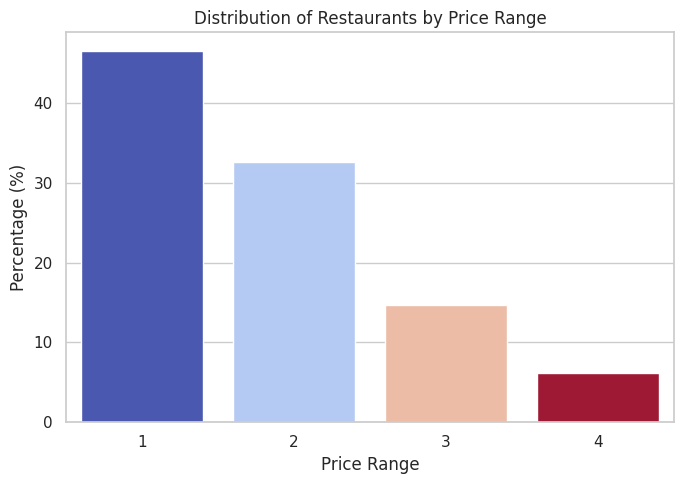

In [8]:
# Check unique price ranges
print("Unique Price Ranges:", df['Price range'].unique())

# Drop nulls if any
df = df.dropna(subset=['Price range'])

# Count restaurants in each price range
price_counts = df['Price range'].value_counts().sort_index()
price_df = price_counts.reset_index()
price_df.columns = ['Price Range', 'Restaurant Count']

# Calculate % of restaurants per category
total = price_df['Restaurant Count'].sum()
price_df['Percentage'] = (price_df['Restaurant Count'] / total) * 100

# Output stats
print(price_df)

# Plot
plt.figure(figsize=(7,5))
sns.barplot(data=price_df, x='Price Range', y='Percentage', hue='Price Range', palette='coolwarm', legend=False)
plt.title("Distribution of Restaurants by Price Range")
plt.ylabel("Percentage (%)")
plt.xlabel("Price Range")
plt.tight_layout()
plt.show()

**TASK 4: Online Delivery**

Online Delivery Options: ['No' 'Yes']
Online Delivery Distribution:
   Online Delivery  Count  Percentage
0              No   7091   74.313561
1             Yes   2451   25.686439


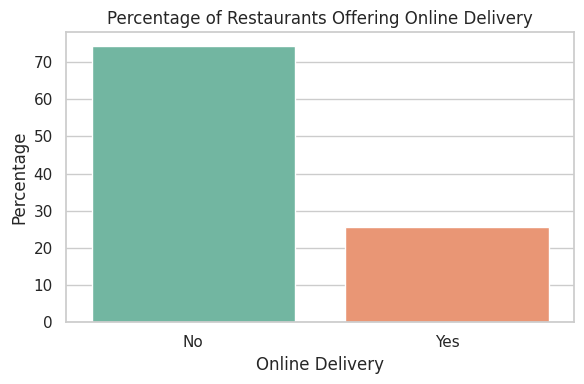

Rating Comparison:
   Online Delivery  Average Rating
0              No        2.463517
1             Yes        3.248837


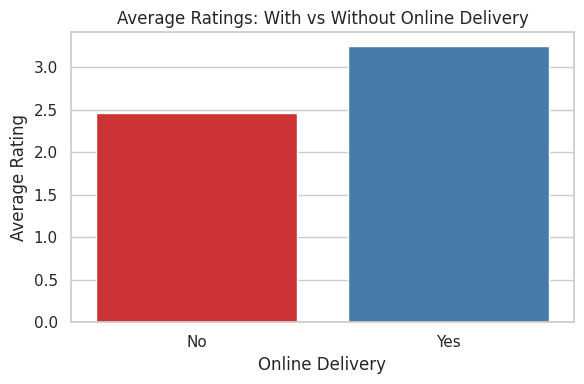

In [9]:
# Clean & check values
print("Online Delivery Options:", df['Has Online delivery'].unique())

# Drop nulls if any
df = df.dropna(subset=['Has Online delivery', 'Aggregate rating'])

# Convert rating to numeric
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Count delivery vs non-delivery
delivery_counts = df['Has Online delivery'].value_counts()
delivery_df = delivery_counts.reset_index()
delivery_df.columns = ['Online Delivery', 'Count']
delivery_df['Percentage'] = (delivery_df['Count'] / delivery_df['Count'].sum()) * 100

print("Online Delivery Distribution:\n", delivery_df)

# Plot delivery distribution
plt.figure(figsize=(6,4))
sns.barplot(data=delivery_df, x='Online Delivery', y='Percentage', hue='Online Delivery', palette='Set2', legend=False)
plt.title("Percentage of Restaurants Offering Online Delivery")
plt.ylabel("Percentage")
plt.xlabel("Online Delivery")
plt.tight_layout()
plt.show()

# Rating comparison
rating_comparison = df.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()
rating_comparison.columns = ['Online Delivery', 'Average Rating']

print("Rating Comparison:\n", rating_comparison)

# Plot rating comparison
plt.figure(figsize=(6,4))
sns.barplot(data=rating_comparison, x='Online Delivery', y='Average Rating', hue='Online Delivery', palette='Set1', legend=False)
plt.title("Average Ratings: With vs Without Online Delivery")
plt.ylabel("Average Rating")
plt.xlabel("Online Delivery")
plt.tight_layout()
plt.show()

💡 Insights

1. Top cuisines: Indian, North Indian, and Chinese dominated the dataset.

2. Top city: The city with the most restaurants differed from the city with the highest average rating — showing quantity ≠ quality.

3. Price range: Most restaurants fall under affordable/mid-tier categories.

4. Online delivery: Restaurants offering delivery generally had slightly higher ratings, indicating convenience impacts satisfaction.